In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# read dataset

In [2]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 18789602.84it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 302261.64it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5464951.24it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5327480.14it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image,label=train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
label

9

In [6]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_index=train_data.class_to_idx
print(class_to_index)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
class_name[label]

'Ankle boot'

In [11]:
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=30, shuffle=True)

# # Get a batch of data (30 images in this case)
# data_iter = iter(train_loader)
# images, labels = next(data_iter)

# # Create a 6x5 grid to display the images
# fig, axes = plt.subplots(6, 5, figsize=(10, 12))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(images[i][0], cmap='gray')
#     ax.axis('off')
#     ax.set_title(f'Label: {labels[i].item()}')

# plt.tight_layout()
# plt.show()

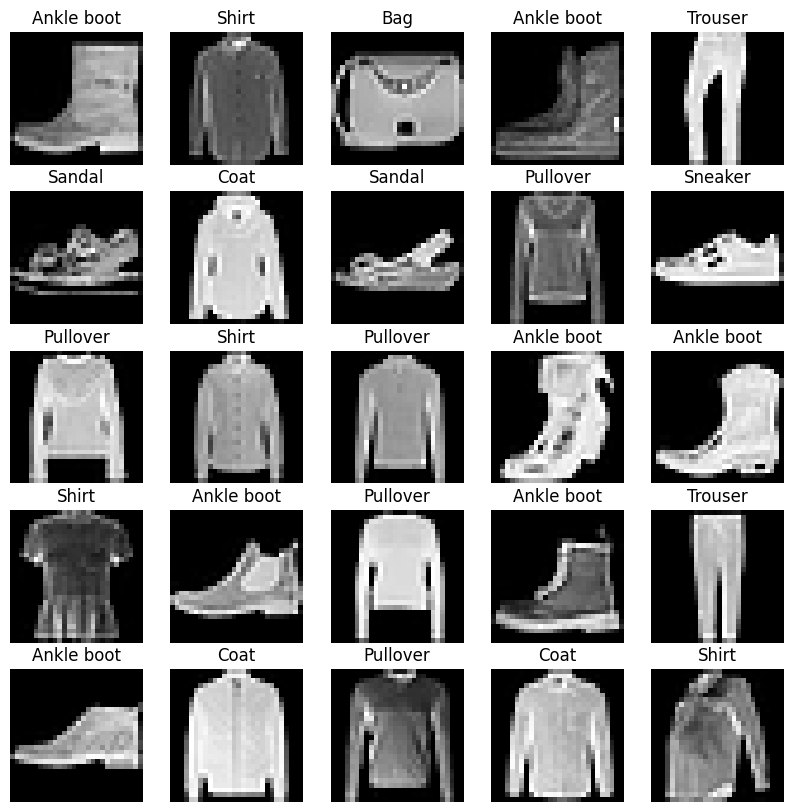

In [12]:
torch.manual_seed(42)
fig=plt.figure(figsize=(10,10))
rows,cols=5,5
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_name[label])
  plt.axis("off")
plt.show()

In [13]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

# prepare dataloader

In [15]:
from torch.utils.data import DataLoader
batch_size=32
train_dataloader=DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False)

In [16]:
train_dataloader

In [17]:
len(train_dataloader)

1875

In [18]:
len(test_dataloader)

313

In [19]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
print("Train features batch shape :",train_features_batch.shape)
print("Train Labels batch shape :",train_labels_batch.shape)

Train features batch shape : torch.Size([32, 1, 28, 28])
Train Labels batch shape : torch.Size([32])


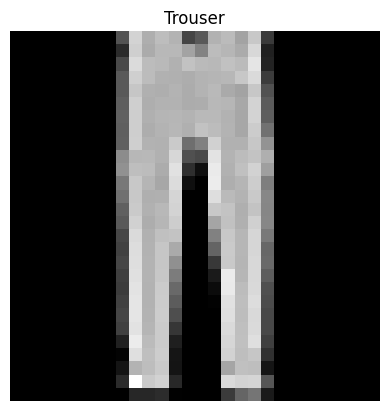



****************************************************
Image Size : torch.Size([1, 28, 28])
Image Label : 1,Label size : torch.Size([])


In [20]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis("off")
plt.show()
print("\n")
print("****************************************************")
print(f"Image Size : {img.shape}")
print(f"Image Label : {label},Label size : {label.shape}")

# Create Model 0 Baseline

In [21]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)


In [22]:
x.shape,output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [23]:
from torch import nn

class Model0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()

    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape))

  def forward(self,x):
    return self.layer_stack(x)


In [24]:
torch.manual_seed(42)
model_0=Model0(input_shape=784,hidden_units=10,output_shape=len(class_name)).to("cpu")

In [25]:
# #calculate accuracy
# def accuracy_fn(y_true,y_pred):
#   correct=torch.eq(y_true,y_pred).sum().item()
#   acc=(correct/len(y_pred))*100
#   return acc

In [26]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("exist")
else:
  print("downloading helper functions")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py","wb") as f:
    f.write(request.content)


downloading helper functions


In [27]:
from helper_functions import accuracy_fn

# optimizer and loss for model0

In [28]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [29]:
from timeit import default_timer as timer
def train_time(start,end,device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device}:{total_time:.3f} seconds")
  return total_time

In [30]:
start_time=timer()
end_time=timer()
train_time(start_time,end_time,device="cpu")

Train time on cpu:0.000 seconds


3.0221000002939036e-05

In [31]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_0=timer()
epochs=4

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n----")

  #training
  train_loss,train_acc=0,0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")


  train_loss /=len(train_dataloader)

  ##testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model_0(X_test)
      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
      #test loss avg per batch
    test_loss/=len(test_dataloader)

    test_acc/=len(test_dataloader)

  print(f"\nTrain loss : {train_loss:.4f} | Test Loss :{test_loss:.4f} | Test Acc : {test_acc:.2f}%")

train_end=timer()
total_train=train_time(start=train_time_0,end=train_end,device=str(next(model_0.parameters()).device))

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch : 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.5904 | Test Loss :0.5095 | Test Acc : 82.04%
Epoch : 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.4763 | Test Loss :0.4799 | Test Acc : 83.20%
Epoch : 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.4550 | Test Loss :0.4766 | Test Acc : 83.43%
Epoch : 3
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.4425 | Test Loss :0.4631 | Test Acc : 83.75%
Train time on cpu:46.871 seconds


# make predictions

In [32]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"mode_acc":acc}

model_0_results=eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'Model0',
 'model_loss': 0.4630562663078308,
 'mode_acc': 83.74600638977635}

In [33]:
#device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Create Model with non linear functions

In [34]:
class Model1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU())

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)
model_1=Model1(input_shape=784,hidden_units=10,output_shape=len(class_name)).to(device)

In [35]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [36]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [37]:
def accuracy_fn(y_true, y_pred):
    # Move y_true and y_pred to the same device
    y_true = y_true.to(y_pred.device)

    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [38]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [39]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 2.31975 | Train accuracy: 10.03%
Test loss: 2.31998 | Test accuracy: 10.02%

Epoch: 1
---------
Train loss: 2.31975 | Train accuracy: 10.03%
Test loss: 2.31998 | Test accuracy: 10.02%

Epoch: 2
---------
Train loss: 2.31975 | Train accuracy: 10.03%
Test loss: 2.31998 | Test accuracy: 10.02%

Train time on cuda:32.336 seconds


In [40]:
device

'cuda'

In [41]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device=device):
  loss,acc=0,0
  model.eval()
  model.to(device)
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)
      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"mode_acc":acc}

model_0_results=eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'Model0',
 'model_loss': 0.4630562663078308,
 'mode_acc': 83.74600638977635}

In [42]:
model_1_result=eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [43]:
model_1_result

{'model_name': 'Model1',
 'model_loss': 2.319979667663574,
 'mode_acc': 10.023961661341852}

# Build CNN model

In [44]:
class FashionModel_2(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)


    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )


  def forward(self,x):
    x=self.conv_block_1(x)
    # print(x.shape)
    x=self.conv_block_2(x)
    # print(x.shape)
    x=self.classifier(x)
    return x



In [45]:
model_2=FashionModel_2(input_shape=1,hidden_units=10,output_shape=len(class_name)).to(device)

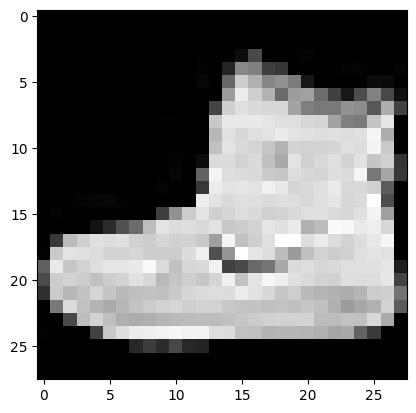

In [46]:
plt.imshow(image.squeeze(),cmap="gray")

In [47]:
rand_image_tensor=torch.randn(size=(1,28,28))

In [48]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 5.1841e-02, -3.8414e-02,  8.7882e-03, -3.8084e-03,  4.7907e-02,
          2.2627e-02, -1.7306e-02,  3.4182e-02,  4.9500e-05,  1.1735e-02]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [49]:
images=torch.randn(size=(32,3,64,64))
test_image=images[0]
images.shape

torch.Size([32, 3, 64, 64])

In [50]:
test_image.shape

torch.Size([3, 64, 64])

In [51]:
conv_layer=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=0)
conv_output=conv_layer(test_image)
conv_output

tensor([[[ 0.4903,  0.0846, -0.6758,  ...,  0.3300,  0.5949,  0.3190],
         [ 0.9227,  0.6594,  0.0095,  ...,  0.6978,  0.3253,  0.3929],
         [ 0.6019,  0.8259,  1.2130,  ...,  0.4818,  0.7110, -1.1426],
         ...,
         [-0.1584,  1.3116,  1.8246,  ...,  0.2460,  0.3623,  1.0778],
         [-0.0044,  0.6043,  0.5578,  ..., -0.1128,  1.0232,  0.2324],
         [-0.1704, -0.5493, -0.2637,  ..., -0.7373, -0.2955,  0.1154]],

        [[ 0.2120, -0.5415,  0.5819,  ..., -0.4359,  0.2731,  0.3101],
         [-0.2076, -0.1795,  0.2892,  ..., -0.4201,  0.4969, -0.0756],
         [-0.8869, -0.4289,  0.2855,  ..., -0.0732, -0.5568,  0.3862],
         ...,
         [-0.4545,  0.5115, -1.3295,  ..., -0.4040,  1.0494, -0.2348],
         [ 1.1905, -0.1700, -1.2302,  ...,  0.0918, -0.2981,  0.1222],
         [-0.7368,  0.0028, -0.8763,  ..., -0.3725,  0.8463, -0.0794]],

        [[ 0.5883,  0.1702, -0.9154,  ..., -0.3753,  0.0115, -0.4107],
         [-0.4676,  0.4842, -0.0301,  ..., -0

In [52]:
print(f"test image orginal shape : {test_image.shape}")
print(f"test image with unsqueeze dimension : {test_image.unsqueeze(0).shape}")

test image orginal shape : torch.Size([3, 64, 64])
test image with unsqueeze dimension : torch.Size([1, 3, 64, 64])


In [53]:
max_pool_layer=nn.MaxPool2d(kernel_size=2)
test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv layer : {test_image_through_conv.shape}")

shape after going through conv layer : torch.Size([1, 10, 62, 62])


In [54]:
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
test_image_through_conv_and_max_pool.shape

torch.Size([1, 10, 31, 31])

In [55]:
random_tensor=torch.randn(size=(1,1,2,2))
max_pool_layer=nn.MaxPool2d(kernel_size=2)
max_pool_tensor=max_pool_layer(random_tensor)
print(f"Random tensor shape : {random_tensor.shape}")
print("============================================")
print(f"max pool tensor shape : {max_pool_tensor.shape}")

Random tensor shape : torch.Size([1, 1, 2, 2])
max pool tensor shape : torch.Size([1, 1, 1, 1])


In [56]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [57]:
torch.cuda.manual_seed(42)
train_time_1=timer()

epochs=3
for epoch in range(epochs):
  print(f"Epoch : {epoch}\n-----")
  train_step(model=model_2,data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)

  test_step(model=model_2,data_loader=test_dataloader,

            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_end_time_1=timer()
total_time_1=train_time(start=train_time_1,end=train_end_time_1,device=device)

Epoch : 0
-----
Train loss: 0.64365 | Train accuracy: 76.52%
Test loss: 0.40679 | Test accuracy: 85.51%

Epoch : 1
-----
Train loss: 0.38243 | Train accuracy: 86.20%
Test loss: 0.39115 | Test accuracy: 85.67%

Epoch : 2
-----
Train loss: 0.34646 | Train accuracy: 87.50%
Test loss: 0.36404 | Test accuracy: 86.82%

Train time on cuda:37.060 seconds


In [58]:
model_2_result=eval_model(model=model_2,data_loader=test_dataloader,
                    loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionModel_2',
 'model_loss': 0.3640427887439728,
 'mode_acc': 86.82108626198082}

In [59]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,model_1_result,model_2_result])
compare_results

,model_name,model_loss,mode_acc
0,Model0,0.463056,83.746006
1,Model1,2.319980,10.023962
2,FashionModel_2,0.364043,86.821086


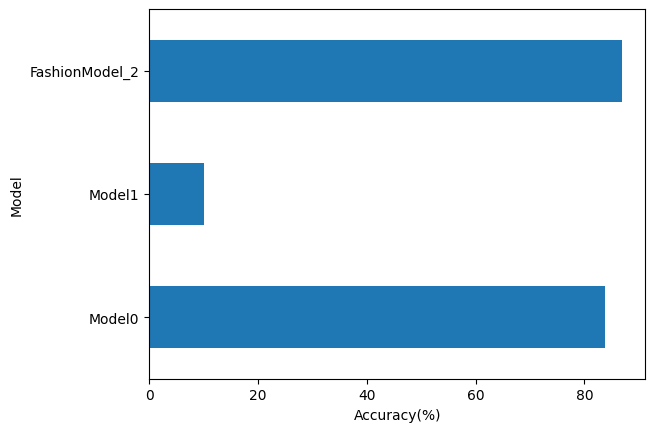

In [60]:
compare_results.set_index("model_name")["mode_acc"].plot(kind="barh")
plt.xlabel("Accuracy(%)")
plt.ylabel("Model")
plt.show()

In [61]:
def make_predictions(model,data,device=device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)
      pred_logit=model(sample)
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [62]:
import random
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

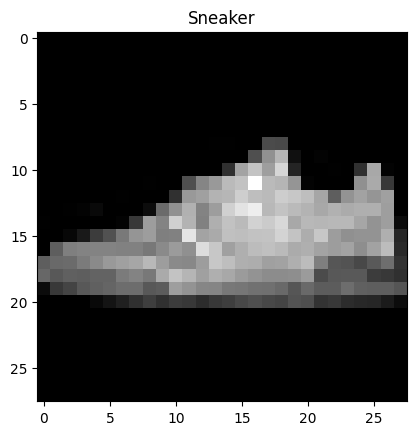

In [63]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_name[test_labels[0]])

In [64]:
pred_probs=make_predictions(model=model_2,data=test_samples)
pred_probs[: 2]

tensor([[2.8068e-07, 9.6072e-08, 8.3632e-07, 9.4903e-07, 7.8246e-08, 2.0488e-04,
         9.9693e-07, 9.9933e-01, 5.4859e-05, 4.0659e-04],
        [1.6197e-03, 7.8966e-03, 3.1810e-04, 9.7840e-01, 2.9323e-03, 2.8019e-04,
         3.5271e-04, 1.4240e-03, 2.3879e-03, 4.3902e-03]])

In [65]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([7, 3, 8, 6, 8, 5, 0, 9, 6])

In [66]:
test_labels

[7, 3, 8, 6, 8, 7, 0, 9, 0]

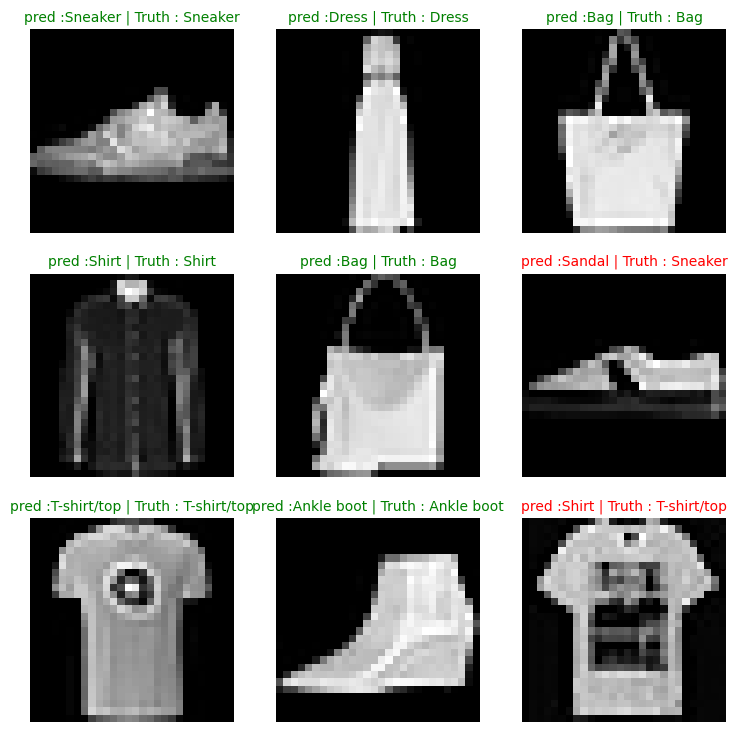

In [71]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label=class_name[pred_classes[i]]

  truth_label=class_name[test_labels[i]]
  title_text=f"pred :{pred_label} | Truth : {truth_label}"
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,color="green")
  else:
    plt.title(title_text,fontsize=10,color="red")
  plt.axis("off")


In [74]:
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="make_predictions"):
    X,y=X.to(device),y.to(device)
    y_logit=model_2(X)
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())





# print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[: 5]

make_predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6])

In [82]:
!pip install torchmetrics


In [83]:
import torchmetrics,mlxtend

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

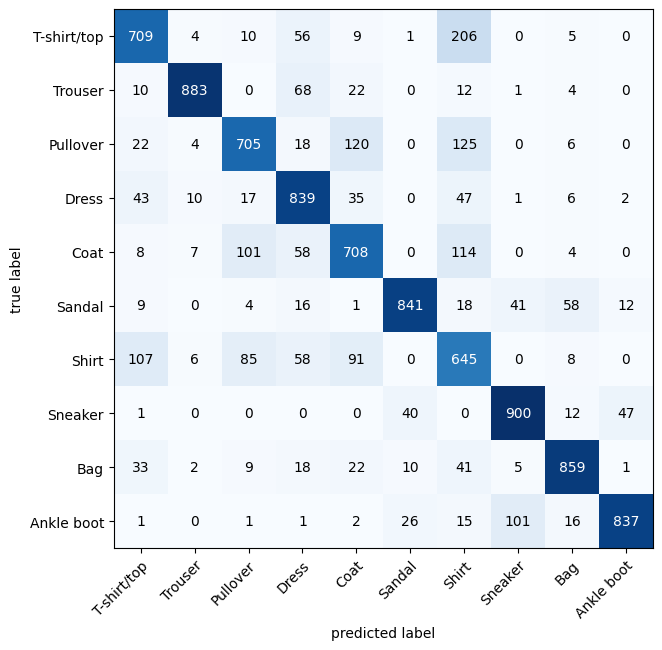

In [89]:
confmat=ConfusionMatrix(num_classes=len(class_name),task="multiclass")
confmat_tensor=confmat(preds=y_pred_tensor,target=test_data.targets)

confmat_tensor

fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=class_name,
                             figsize=(7,7))

In [91]:
from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="best_model.pth"
model_save_path=model_path/model_name
torch.save(obj=model_2.state_dict(),f=model_save_path)

In [92]:
image_shape=[1,28,28]

In [98]:
loaded_model_2 = FashionModel_2(input_shape=1, hidden_units=10, output_shape=len(class_name))

loaded_model_2.load_state_dict(torch.load(f=model_save_path))
loaded_model_2.to(device)

FashionModel_2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [99]:
loaded_model_2_results=eval_model(model=loaded_model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)


  0%|          | 0/313 [00:00<?, ?it/s]

In [100]:
loaded_model_2_results

{'model_name': 'FashionModel_2',
 'model_loss': 0.3640427887439728,
 'mode_acc': 86.82108626198082}